In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Đọc file dữ liệu chứng khoán Eximbank và chia tập train test theo tỉ lệ 7:3
df = pd.read_csv('Eximbank.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia dữ liệu thành 2 tập train và test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA phù hợp nhất bằng auto_arima 
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit mô hình
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13506.773, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13507.312, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13507.333, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13506.112, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13509.310, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.532 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [4]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [5]:
# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo một mảng gồm 90 số nguyên liên tiếp bắt đầu từ last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán giá đóng cho 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# In ra giá đóng đã được dự đoán trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117 25988.70117
 259

In [6]:
# 6. Tính độ đo RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 8173.634636282053


In [7]:
# 7. Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 45.611163685815534


In [8]:
# 8. Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing MAE: 7950.995747806123


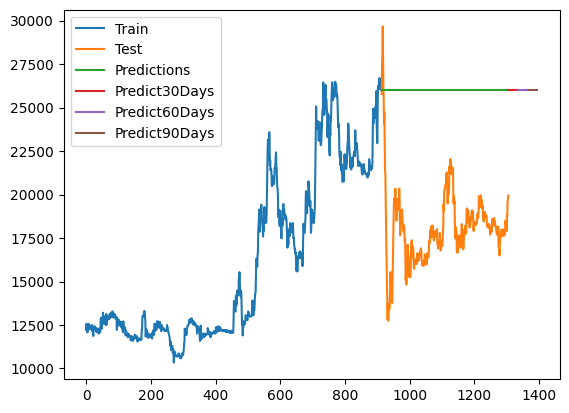

In [9]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Train', 'Test', 'Predictions','Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()

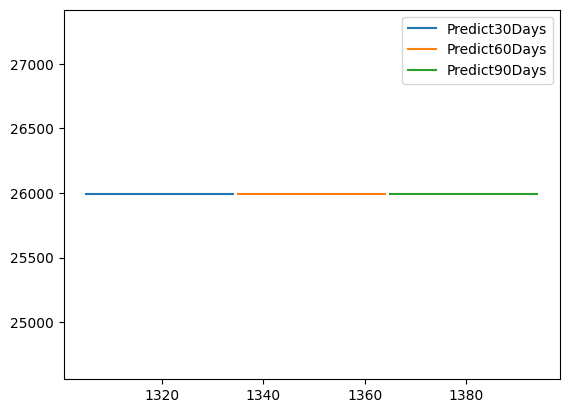

In [10]:
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()